In [7]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [12]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
 
demo_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])

In [13]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(csv, split_percent=0.8):
    df = pd.read_csv(csv, usecols=[8], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data
 
csv = "dc.csv"
train_data, test_data, data = get_train_test(csv)

In [14]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
 
time_steps = 18
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [15]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
44/44 - 3s - loss: 0.0132 - 3s/epoch - 72ms/step
Epoch 2/20
44/44 - 0s - loss: 0.0081 - 325ms/epoch - 7ms/step
Epoch 3/20
44/44 - 0s - loss: 0.0064 - 330ms/epoch - 7ms/step
Epoch 4/20
44/44 - 0s - loss: 0.0052 - 336ms/epoch - 8ms/step
Epoch 5/20
44/44 - 0s - loss: 0.0042 - 320ms/epoch - 7ms/step
Epoch 6/20
44/44 - 0s - loss: 0.0036 - 306ms/epoch - 7ms/step
Epoch 7/20
44/44 - 0s - loss: 0.0032 - 304ms/epoch - 7ms/step
Epoch 8/20
44/44 - 0s - loss: 0.0028 - 293ms/epoch - 7ms/step
Epoch 9/20
44/44 - 0s - loss: 0.0026 - 277ms/epoch - 6ms/step
Epoch 10/20
44/44 - 0s - loss: 0.0024 - 229ms/epoch - 5ms/step
Epoch 11/20
44/44 - 0s - loss: 0.0023 - 188ms/epoch - 4ms/step
Epoch 12/20
44/44 - 0s - loss: 0.0022 - 258ms/epoch - 6ms/step
Epoch 13/20
44/44 - 0s - loss: 0.0021 - 245ms/epoch - 6ms/step
Epoch 14/20
44/44 - 0s - loss: 0.0021 - 250ms/epoch - 6ms/step
Epoch 15/20
44/44 - 0s - loss: 0.0020 - 237ms/epoch - 5ms/step
Epoch 16/20
44/44 - 0s - loss: 0.0019 - 253ms/epoch - 6ms/step
Epo

In [33]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse)) 
    return test_rmse
 
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.042 RMSE
Test RMSE: 0.013 RMSE


0.01325225171235601

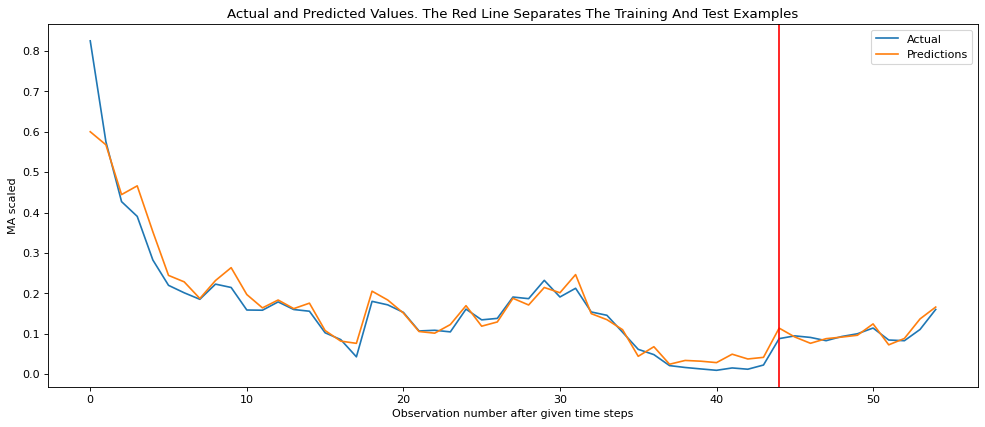

In [17]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('MA scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)

### Testing Multiple RNN Models

In [48]:
def run_rnn_model(activation, activation2, num_timesteps):
    #demo_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])
    csv = "dc.csv"
    train_data, test_data, data = get_train_test(csv)
    time_steps = num_timesteps
    trainX, trainY = get_XY(train_data, time_steps)
    testX, testY = get_XY(test_data, time_steps)
    model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=[activation, activation2])
    model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)
    # make predictions
    train_predict = model.predict(trainX)
    test_predict = model.predict(testX)
    # Mean square error
    print_error(trainY, testY, train_predict, test_predict)
    print("first hidden layer activation = " + activation + ", second layer activation = " + activation2 + ", time steps = " + str(time_steps))
    plot_result(trainY, testY, train_predict, test_predict)
    

Epoch 1/10
66/66 - 2s - loss: 0.0574 - 2s/epoch - 28ms/step
Epoch 2/10
66/66 - 0s - loss: 0.0574 - 378ms/epoch - 6ms/step
Epoch 3/10
66/66 - 0s - loss: 0.0574 - 381ms/epoch - 6ms/step
Epoch 4/10
66/66 - 0s - loss: 0.0574 - 378ms/epoch - 6ms/step
Epoch 5/10
66/66 - 0s - loss: 0.0574 - 373ms/epoch - 6ms/step
Epoch 6/10
66/66 - 0s - loss: 0.0574 - 372ms/epoch - 6ms/step
Epoch 7/10
66/66 - 0s - loss: 0.0574 - 363ms/epoch - 6ms/step
Epoch 8/10
66/66 - 0s - loss: 0.0574 - 371ms/epoch - 6ms/step
Epoch 9/10
66/66 - 0s - loss: 0.0574 - 375ms/epoch - 6ms/step
Epoch 10/10
66/66 - 0s - loss: 0.0574 - 370ms/epoch - 6ms/step
Train RMSE: 0.240 RMSE
Test RMSE: 0.101 RMSE
first hidden layer activation = relu, second layer activation = relu, time steps = 12
Epoch 1/10
44/44 - 2s - loss: 0.0511 - 2s/epoch - 43ms/step
Epoch 2/10
44/44 - 0s - loss: 0.0511 - 317ms/epoch - 7ms/step
Epoch 3/10
44/44 - 0s - loss: 0.0511 - 311ms/epoch - 7ms/step
Epoch 4/10
44/44 - 0s - loss: 0.0511 - 302ms/epoch - 7ms/step
Epoc

Epoch 1/10
33/33 - 2s - loss: 0.0134 - 2s/epoch - 52ms/step
Epoch 2/10
33/33 - 0s - loss: 0.0034 - 312ms/epoch - 9ms/step
Epoch 3/10
33/33 - 0s - loss: 0.0023 - 303ms/epoch - 9ms/step
Epoch 4/10
33/33 - 0s - loss: 0.0022 - 297ms/epoch - 9ms/step
Epoch 5/10
33/33 - 0s - loss: 0.0020 - 306ms/epoch - 9ms/step
Epoch 6/10
33/33 - 0s - loss: 0.0017 - 316ms/epoch - 10ms/step
Epoch 7/10
33/33 - 0s - loss: 0.0016 - 293ms/epoch - 9ms/step
Epoch 8/10
33/33 - 0s - loss: 0.0014 - 287ms/epoch - 9ms/step
Epoch 9/10
33/33 - 0s - loss: 0.0013 - 305ms/epoch - 9ms/step
Epoch 10/10
33/33 - 0s - loss: 0.0011 - 289ms/epoch - 9ms/step
Train RMSE: 0.033 RMSE
Test RMSE: 0.017 RMSE
first hidden layer activation = tanh, second layer activation = relu, time steps = 24
Epoch 1/10
66/66 - 2s - loss: 0.0055 - 2s/epoch - 28ms/step
Epoch 2/10
66/66 - 0s - loss: 0.0040 - 381ms/epoch - 6ms/step
Epoch 3/10
66/66 - 0s - loss: 0.0033 - 376ms/epoch - 6ms/step
Epoch 4/10
66/66 - 0s - loss: 0.0027 - 383ms/epoch - 6ms/step
Epo

Epoch 1/10
44/44 - 2s - loss: 0.0104 - 2s/epoch - 45ms/step
Epoch 2/10
44/44 - 0s - loss: 0.0010 - 300ms/epoch - 7ms/step
Epoch 3/10
44/44 - 0s - loss: 7.5882e-04 - 291ms/epoch - 7ms/step
Epoch 4/10
44/44 - 0s - loss: 6.8435e-04 - 280ms/epoch - 6ms/step
Epoch 5/10
44/44 - 0s - loss: 6.8788e-04 - 288ms/epoch - 7ms/step
Epoch 6/10
44/44 - 0s - loss: 7.4983e-04 - 290ms/epoch - 7ms/step
Epoch 7/10
44/44 - 0s - loss: 7.0208e-04 - 286ms/epoch - 7ms/step
Epoch 8/10
44/44 - 0s - loss: 7.8328e-04 - 304ms/epoch - 7ms/step
Epoch 9/10
44/44 - 0s - loss: 7.0394e-04 - 286ms/epoch - 6ms/step
Epoch 10/10
44/44 - 0s - loss: 6.2943e-04 - 315ms/epoch - 7ms/step
Train RMSE: 0.023 RMSE
Test RMSE: 0.013 RMSE
first hidden layer activation = linear, second layer activation = tanh, time steps = 18
Epoch 1/10
33/33 - 2s - loss: 0.0705 - 2s/epoch - 54ms/step
Epoch 2/10
33/33 - 0s - loss: 0.0086 - 265ms/epoch - 8ms/step
Epoch 3/10
33/33 - 0s - loss: 0.0054 - 290ms/epoch - 9ms/step
Epoch 4/10
33/33 - 0s - loss: 0.

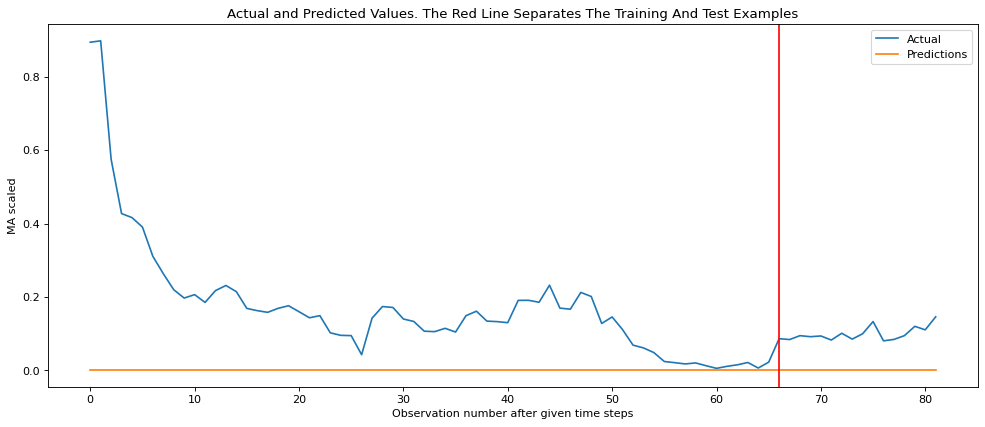

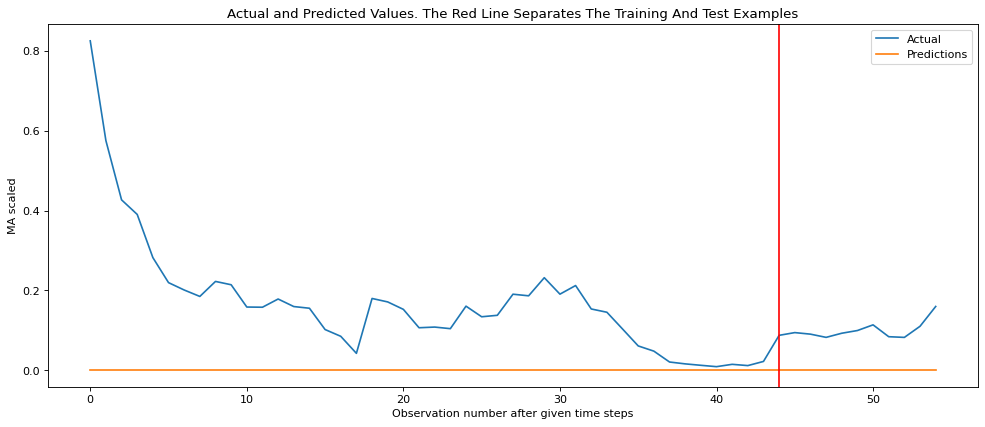

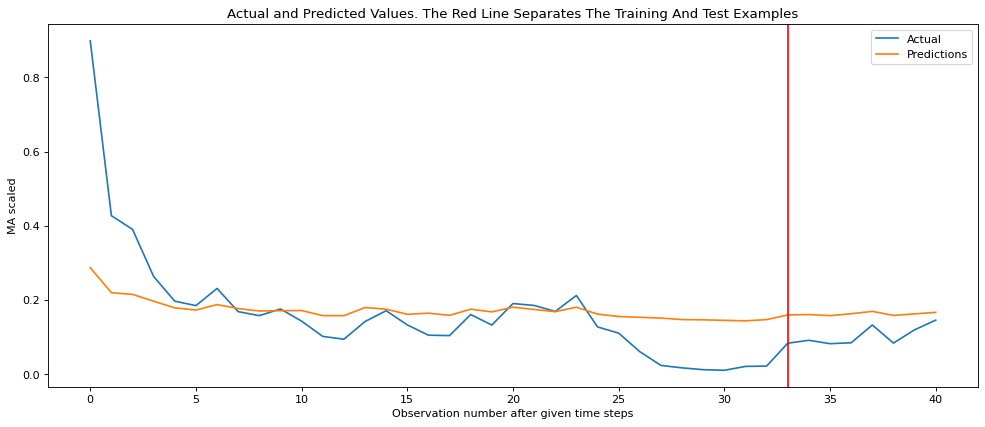

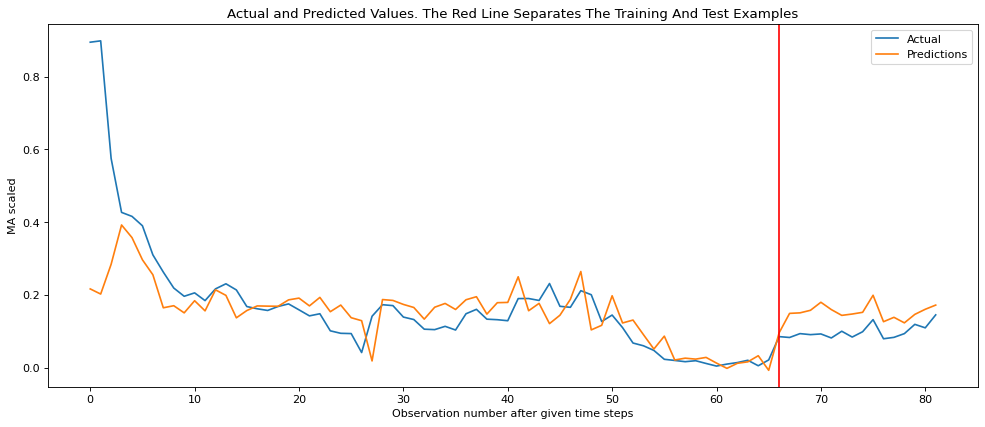

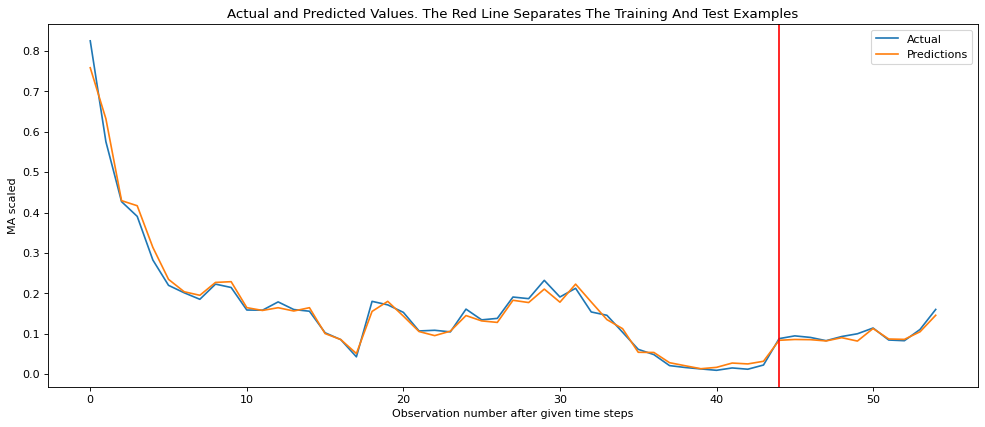

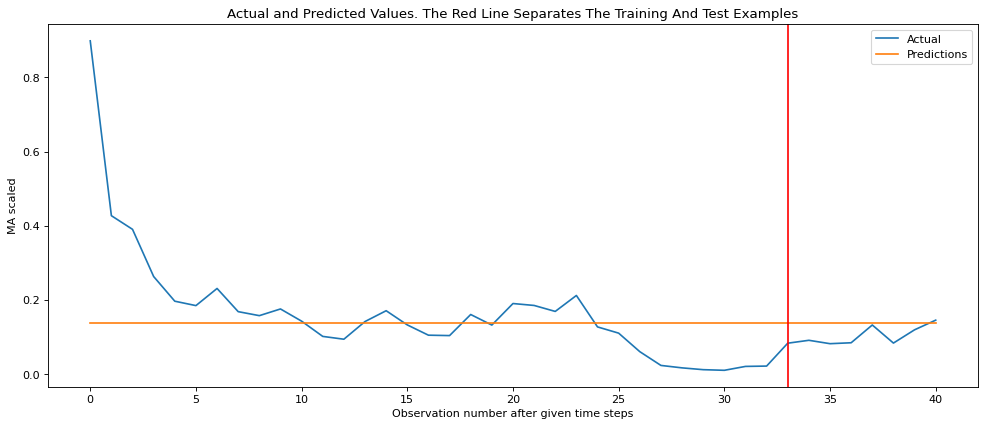

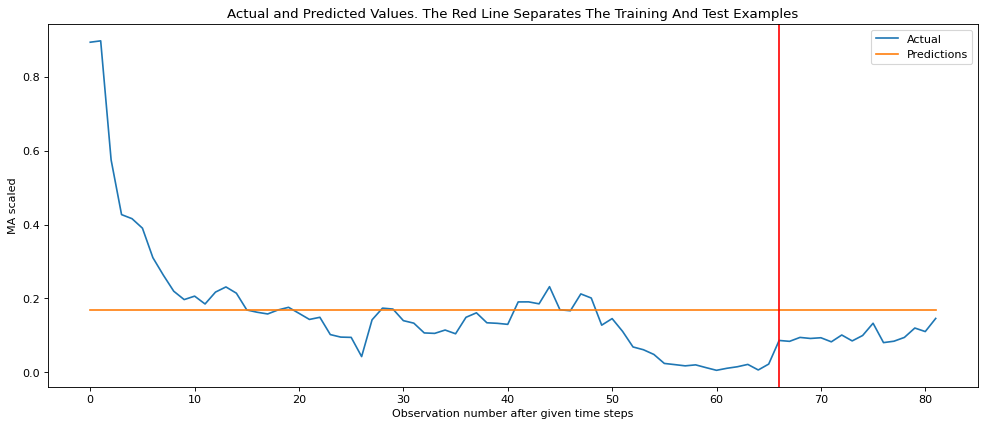

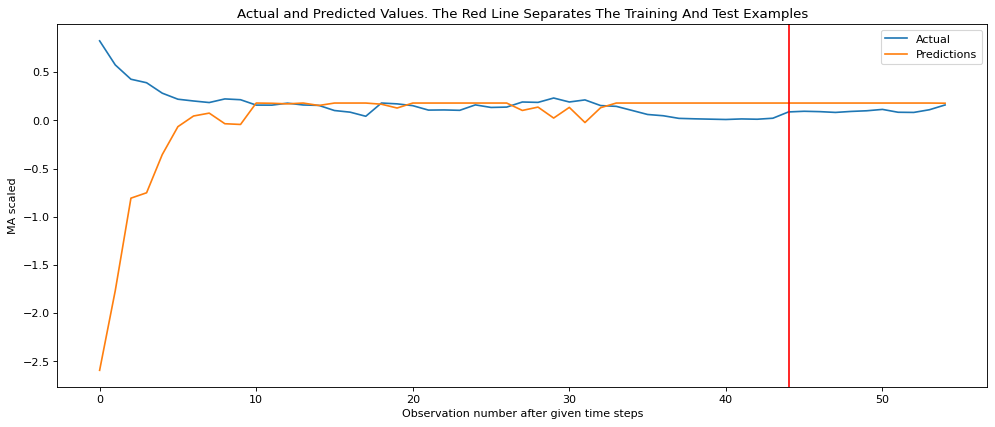

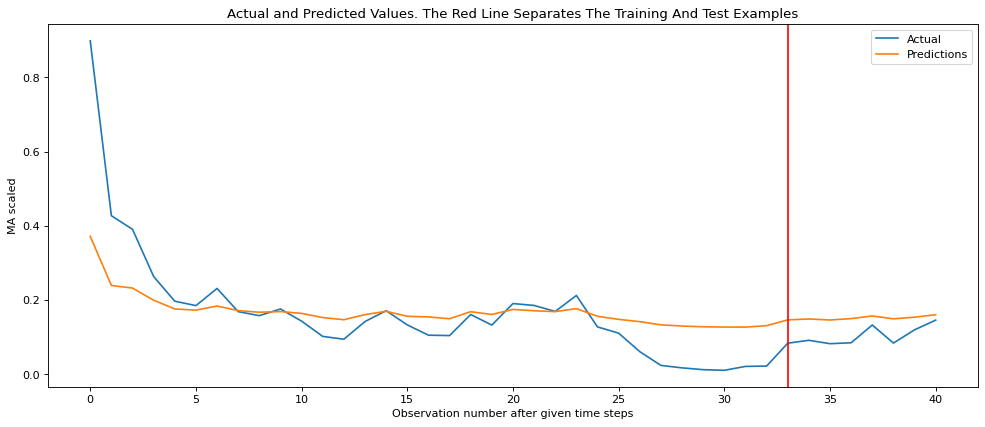

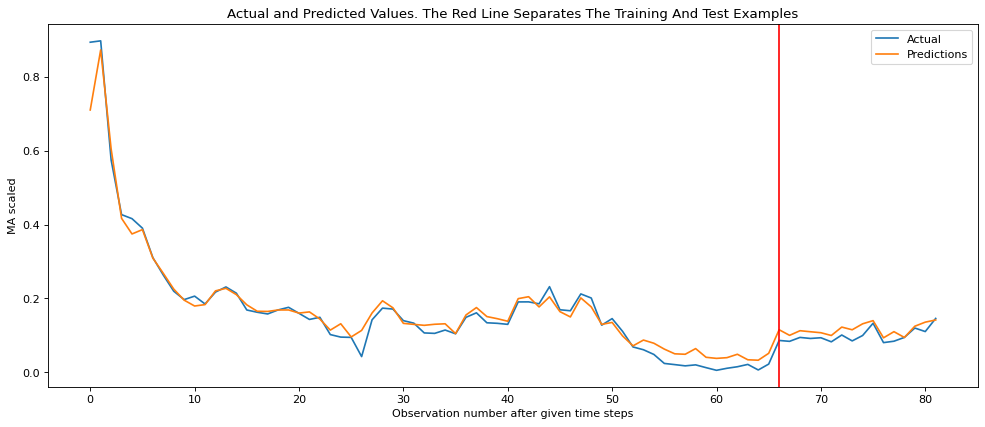

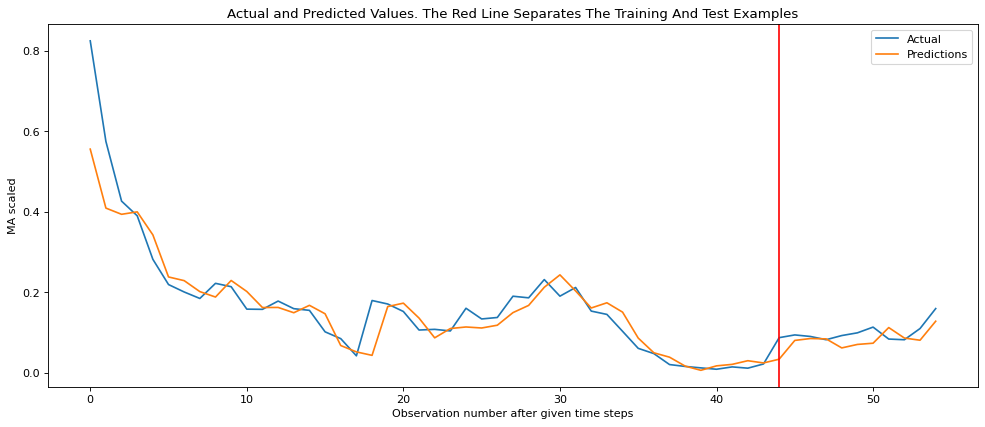

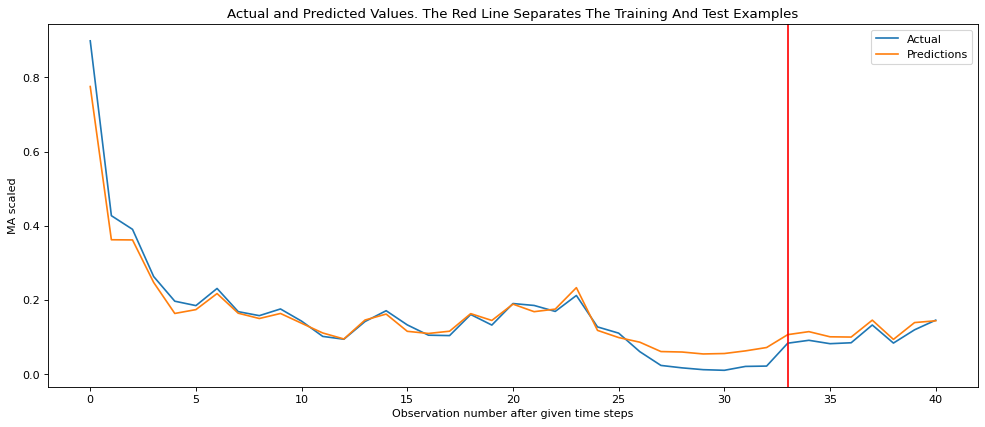

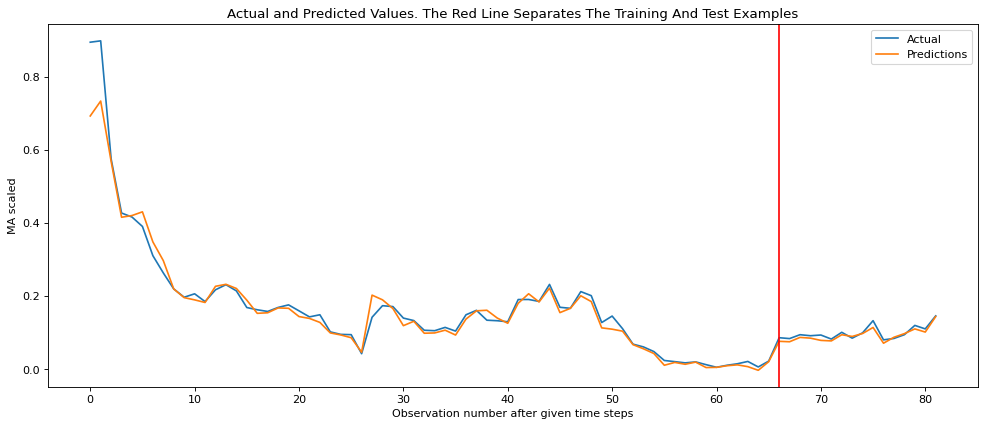

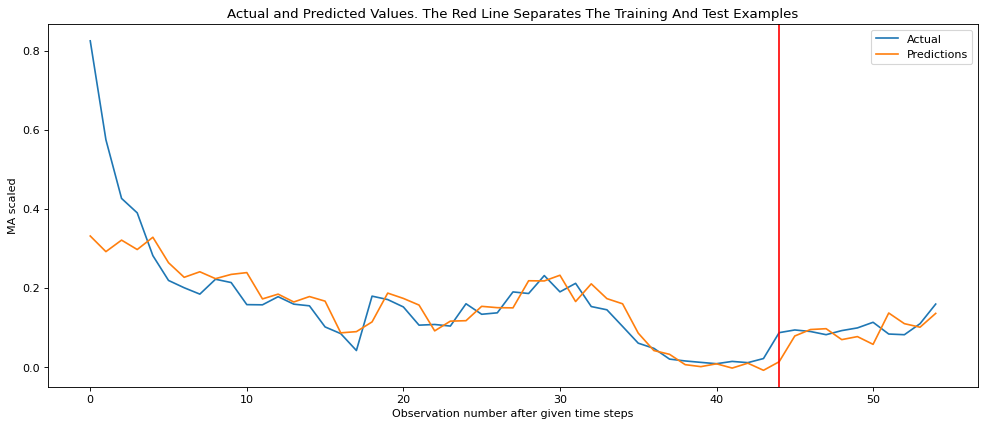

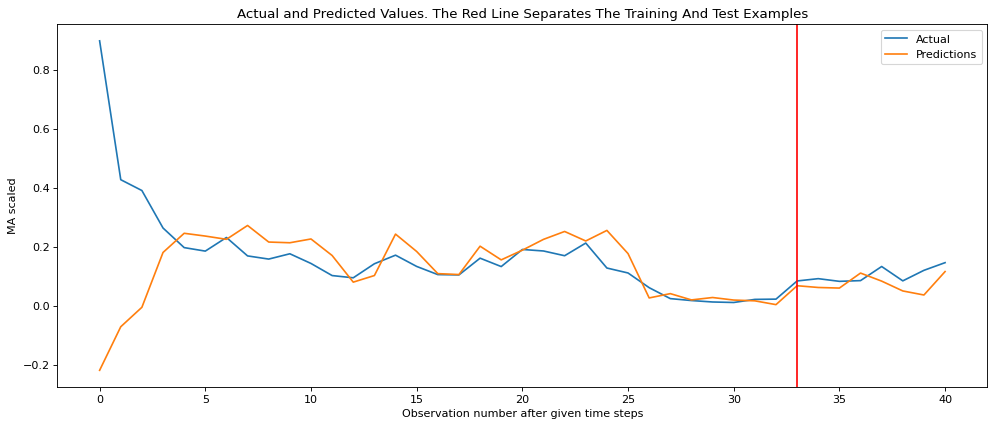

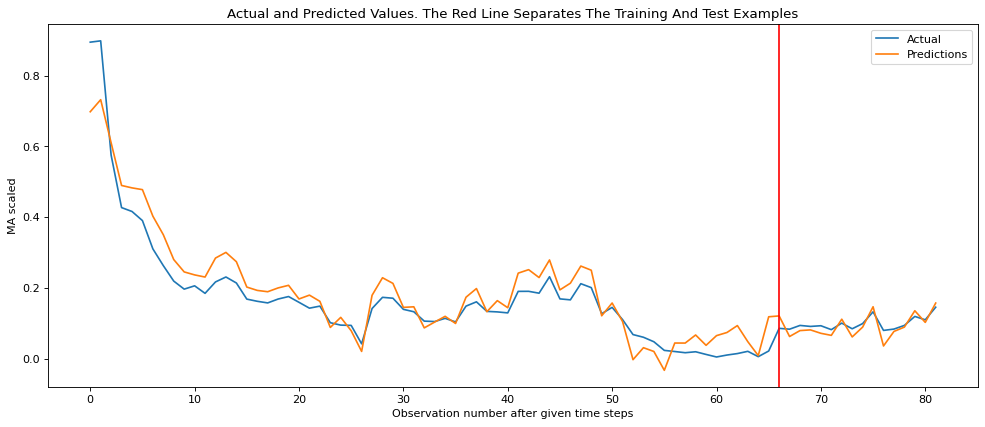

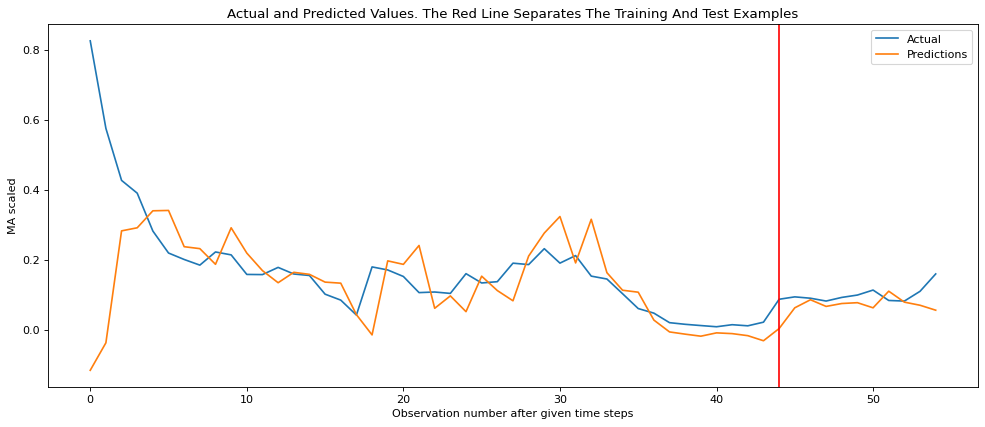

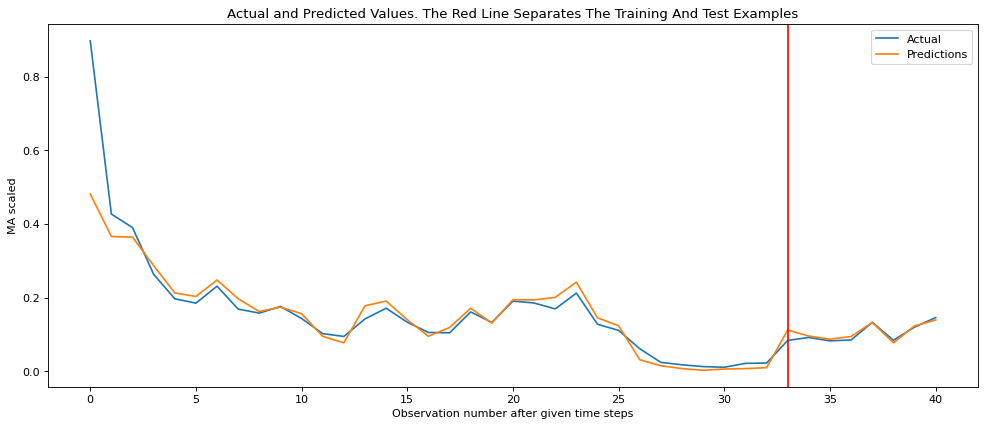

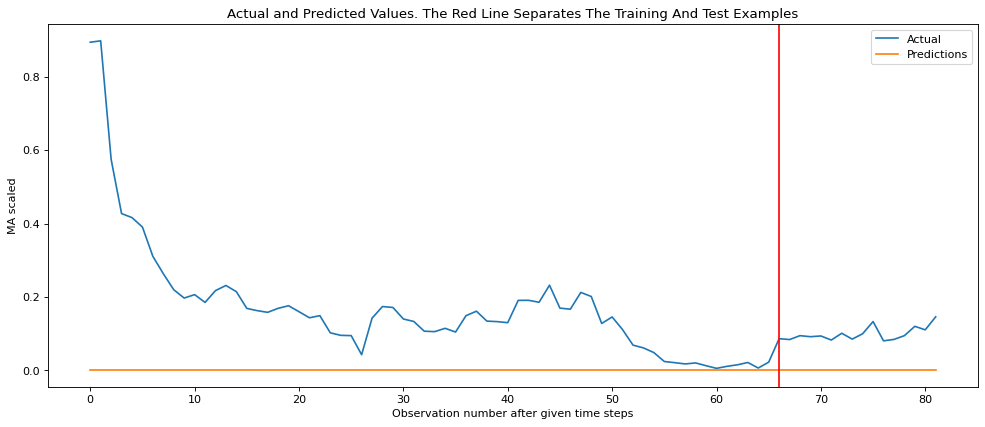

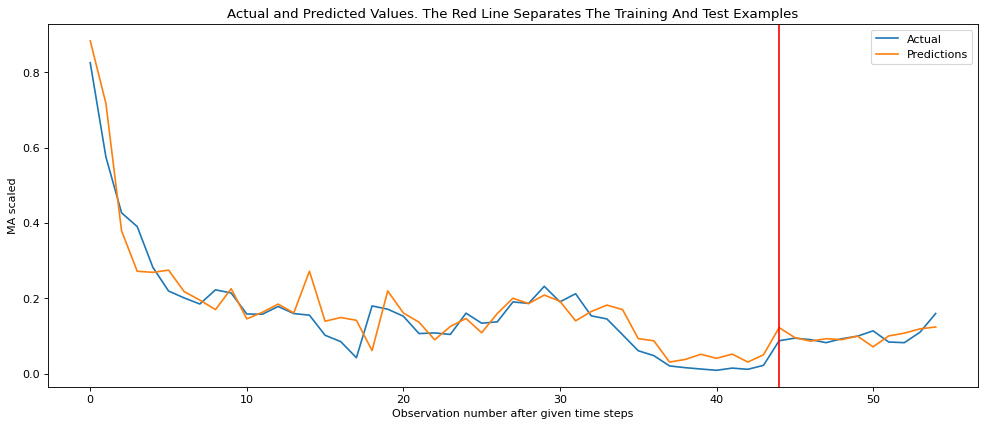

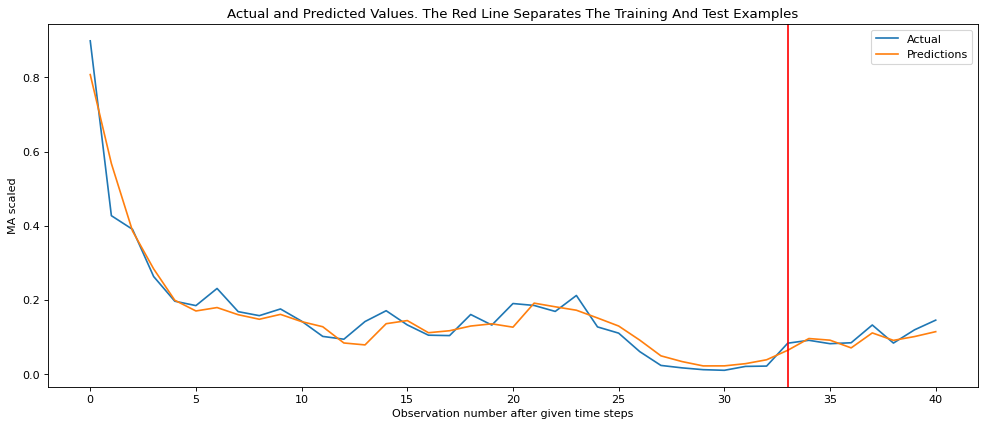

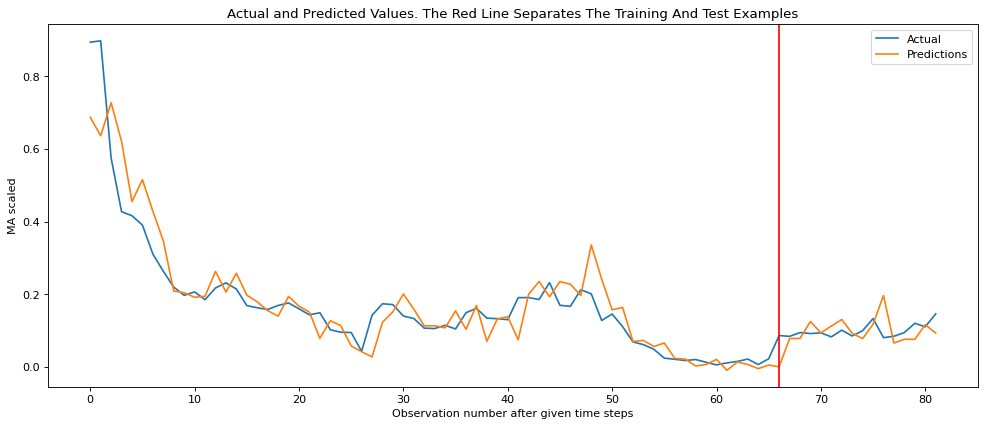

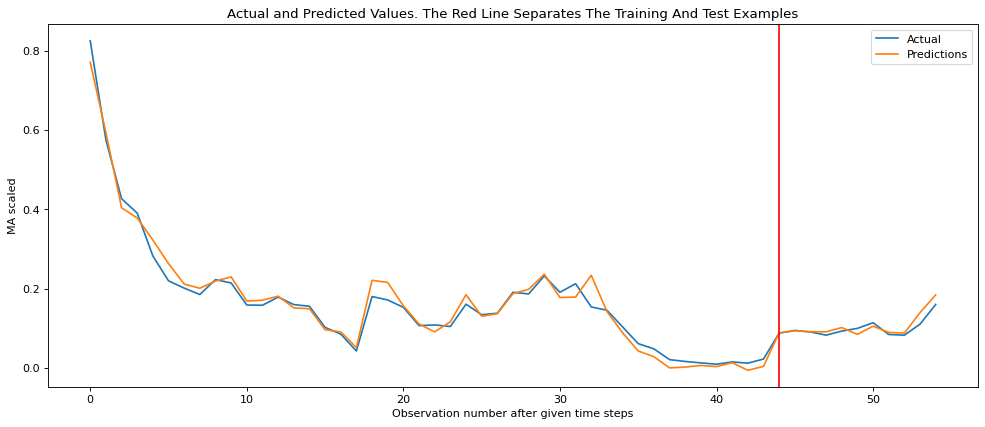

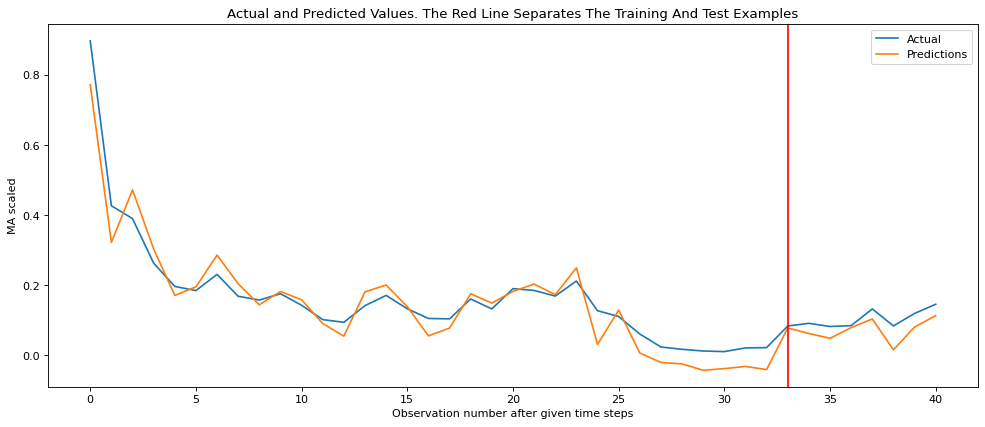

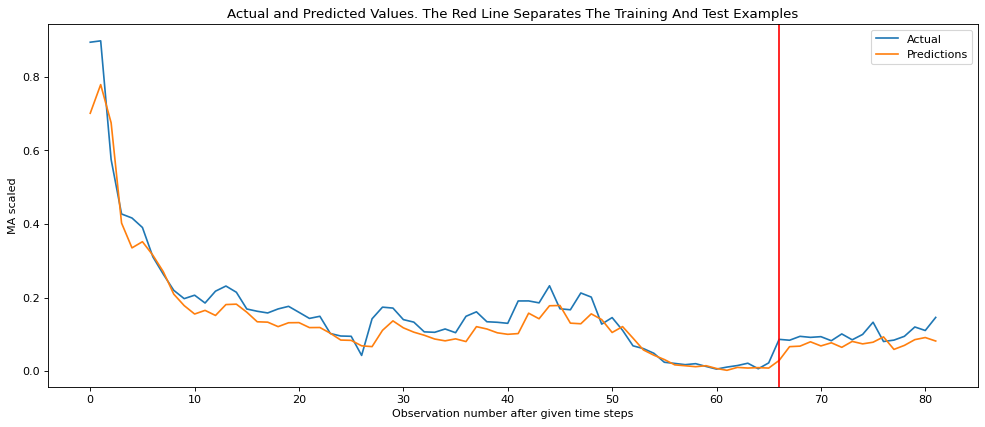

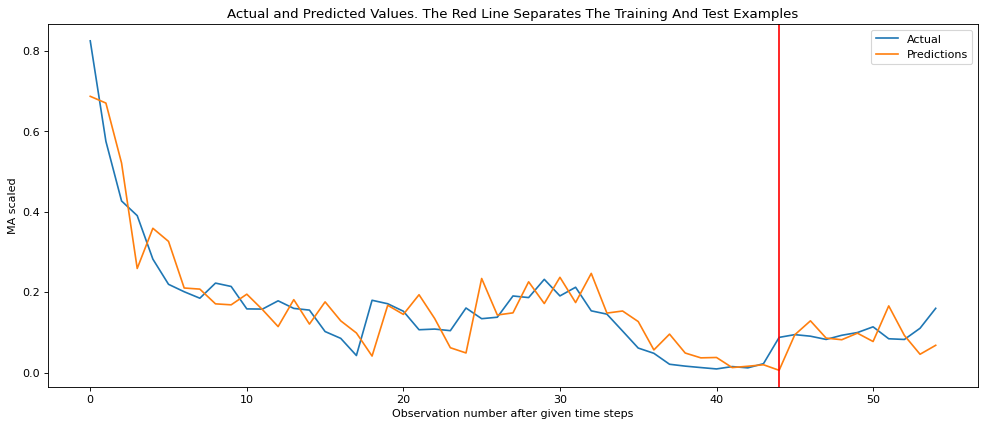

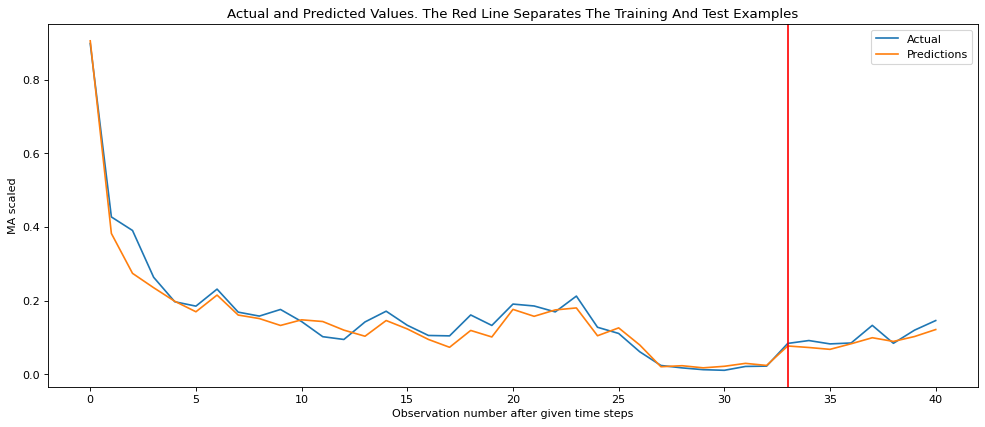

In [50]:
activation_functions = ["relu", "tanh", "linear"]
time_steps = [12, 18, 24]

for a in activation_functions:
    for b in activation_functions:
        for ts in time_steps:
            run_rnn_model(a, b, ts)

### Final Model

Epoch 1/10
66/66 - 2s - loss: 0.0631 - 2s/epoch - 29ms/step
Epoch 2/10
66/66 - 0s - loss: 0.0328 - 377ms/epoch - 6ms/step
Epoch 3/10
66/66 - 0s - loss: 0.0194 - 393ms/epoch - 6ms/step
Epoch 4/10
66/66 - 0s - loss: 0.0124 - 377ms/epoch - 6ms/step
Epoch 5/10
66/66 - 0s - loss: 0.0066 - 354ms/epoch - 5ms/step
Epoch 6/10
66/66 - 0s - loss: 0.0043 - 381ms/epoch - 6ms/step
Epoch 7/10
66/66 - 0s - loss: 0.0028 - 366ms/epoch - 6ms/step
Epoch 8/10
66/66 - 0s - loss: 0.0020 - 377ms/epoch - 6ms/step
Epoch 9/10
66/66 - 0s - loss: 0.0015 - 363ms/epoch - 6ms/step
Epoch 10/10
66/66 - 0s - loss: 0.0013 - 349ms/epoch - 5ms/step
Train RMSE: 0.034 RMSE
Test RMSE: 0.016 RMSE
first hidden layer activation = tanh, second layer activation = linear, time steps = 12


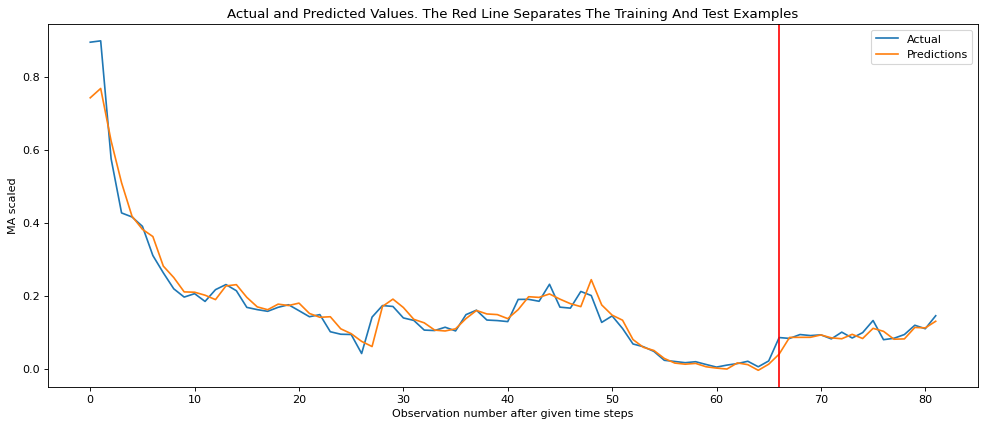

In [56]:
run_rnn_model("tanh", "linear", 12)

### Summary

We tested multiple recurrent neural networks using different activation functions at each hidden layer. We also tested time step values of 12, 18, and 24. Ultimately, the best performing model used tanh as the activation function for the first hidden layer, had a linear activation function for the second hidden layer, and used 12 time steps. Given the performance of our model, we can confidently predict the price of bitcoin.